# Example 9.5: Modified Brayton Cycle (Cold-Air-Standard)

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement

A Brayton cycle with intercooling, reheat, and regeneration has the following properties:
\begin{align}
T_1&=300\ \mathrm{K} & T_3&=350\ \mathrm{K} & T_6&=T_8=1400\ \mathrm{K} \\
p_1 &= 1\ \mathrm{bar}  & \frac{p_2}{p_1}&=\frac{p_4}{p_3}=\sqrt{10} & p_7&=\sqrt{10}\ \mathrm{bar}\\
\eta_{c,1} &= \eta_{c,2} = 0.8 & \eta_{t,1}&=\eta_{t,2}=0.8 & \eta_{reg}&= 0.85
\end{align}
Determine:
* (a) $w_{net}$
* (b) $q_{in}$
* (c) $\eta_{th}$
* (d) $BWR$

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=3074254&node=10465182&a=1163985616&autoplay=1)__

## Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [3]:
from kilojoule.templates.kSI import *

air = idealgas.Properties('Air')

### Given Parameters
We now define variables to hold our known values.

In [4]:
T[1] = Quantity(300,'K')      # Compressor Inlet Temperature
T[3] = Quantity(350,'K')
T[6] = T[8] = Quantity(1400,'K')
p[1] = Quantity(1,'bar')      # Compressor Inlet pressure
r_p = Quantity(sqrt(10),' ')   # Pressure ratio
p[7] = Quantity(sqrt(10),'bar')
eta_c = Quantity(0.8,'')      # Compressor Isentropioc Efficiency
eta_t = Quantity(0.8,'')      # Turbine Isentropic Efficiency
eta_reg = Quantity(0.85,'')   # Regenerator effectiveness

Summary();

### Assumptions
- Cold-air-standard Analysis
  - Ideal gas
  - Constant specific heat (evaluated at $25^\circ\text{C}$)
- Isobaric heat exchagners: Intercooler, Combustors, Regeneator
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [5]:
"Ideal Gas"
R = air.R

"Constant thermal properties evaluated at room temperature"
T_room = Quantity(25,'degC')
c_v = air.Cv(T=T_room)
c_p = air.Cp(T=T_room)
k = air.k(T=T_room)

"Isobaric heat exchangers"
p[2] = r_p*p[1]
p[3] = p[2]
p[4] = r_p*p[3]
p[5] = p[4]
p[6] = p[5]
p[8] = p[7]
p[9] = p[1]
p[10] = p[9]

Summary();

#### (a) $w_{net}$

In [6]:
%%showcalc
"#### 1-2) Non-ideal compression"
"Isentropic exit state: Isentropic Ideal Gas Relations"
p['2s'] = p[2]
T['2s'] = T[1]*r_p**((k-1)/k)

"Isentropic efficiency"
T[2] = T[1] + (T['2s']-T[1])/eta_c

"First Law for compressor"
w_1_to_2 = c_p*(T[1]-T[2])


"#### 2-3) Intercooling"
q_2_to_3 = c_p*(T[3]-T[2])


"#### 3-4) Non-ideal compression"
"Isentropic exit state: Isentropic Ideal Gas Relations"
p['4s'] = p[4]
T['4s'] = T[3]*r_p**((k-1)/k)

"Isentropic efficiency"
T[4] = T[3] + (T['4s']-T[3])/eta_c

"First Law for compressor"
w_3_to_4 = c_p*(T[3]-T[4])


"#### 4-5) Regenerator"
r"Skip for now.  Need $T_9$ to analyze"


"#### 5-6) Combustor 1"
r"Skip for now.  Need $T_5$ from regenerator analysis"


"#### 6-7) Non-ideal expansion"
"Isentropic exit state: Isentropic Ideal Gas Relations"
p['7s'] = p[7]
T['7s'] = T[6]*(1/r_p)**((k-1)/k)

"Isentropic efficiency"
T[7] = T[6] - eta_t*(T[6]-T['7s'])

"First law for turbine"
w_6_to_7 = c_p*(T[6]-T[7])


"#### 7-8) Combustor 2"
q_7_to_8 = c_p*(T[8]-T[7])


"#### 8-9) Non-ideal expansion"
"Isentropic exit state: Isentropic Ideal Gas Relations"
p['9s'] = p[9]
T['9s'] = T[8]*(1/r_p)**((k-1)/k)

"Isentropic efficiency"
T[9] = T[8] - eta_t*(T[8]-T['9s'])

"First law for turbine"
w_8_to_9 = c_p*(T[8]-T[9])


r"##### $w_{net}$"
w_net = w_1_to_2 + w_3_to_4 + w_6_to_7 + w_8_to_9

#### 1-2) Non-ideal compression
Isentropic exit state: Isentropic Ideal Gas Relations
\begin{align}
  {p}_{ \mathrm{2s} } &=  {p}_{ 2 }  = 316.23\ \mathrm{kPa} 
\end{align}

\begin{align}
  {T}_{ \mathrm{2s} } &=   {T}_{ 1 }  \cdot  {r_{p}}^{\frac{  k - 1  }{ k }}  \\
    &=  300\ \mathrm{K}  \cdot  {3.1623}^{\frac{  1.4 - 1  }{ 1.4 }} \\
    &= 416.84\ \mathrm{K}
\end{align}

Isentropic efficiency
\begin{align}
  {T}_{ 2 } &=  {T}_{ 1 } + \frac{  {T}_{ \mathrm{2s} } - {T}_{ 1 }  }{ \eta_{c} } \\
    &= 300\ \mathrm{K} + \frac{  416.84\ \mathrm{K} - 300\ \mathrm{K}  }{ 0.8 }\\
    &= 446.05\ \mathrm{K}
\end{align}

First Law for compressor
\begin{align}
  w_{1\to{}2} &=   c_{p}  \cdot  \left(  {T}_{ 1 } - {T}_{ 2 }  \right)  \\
    &=  1.0047\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  \cdot  \left(  300\ \mathrm{K} - 446.05\ \mathrm{K}  \right) \\
    &= -146.74\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### 2-3) Intercooling
\begin{align}
  q_{2\to{}3} &=   c_{p}  \cdot  \left(  {T}_{ 3 } - {T}_{ 2 }  \right)  \\
    &=  1.0047\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  \cdot  \left(  350\ \mathrm{K} - 446.05\ \mathrm{K}  \right) \\
    &= -96.507\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### 3-4) Non-ideal compression
Isentropic exit state: Isentropic Ideal Gas Relations
\begin{align}
  {p}_{ \mathrm{4s} } &=  {p}_{ 4 }  = 1000.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {T}_{ \mathrm{4s} } &=   {T}_{ 3 }  \cdot  {r_{p}}^{\frac{  k - 1  }{ k }}  \\
    &=  350\ \mathrm{K}  \cdot  {3.1623}^{\frac{  1.4 - 1  }{ 1.4 }} \\
    &= 486.32\ \mathrm{K}
\end{align}

Isentropic efficiency
\begin{align}
  {T}_{ 4 } &=  {T}_{ 3 } + \frac{  {T}_{ \mathrm{4s} } - {T}_{ 3 }  }{ \eta_{c} } \\
    &= 350\ \mathrm{K} + \frac{  486.32\ \mathrm{K} - 350\ \mathrm{K}  }{ 0.8 }\\
    &= 520.4\ \mathrm{K}
\end{align}

First Law for compressor
\begin{align}
  w_{3\to{}4} &=   c_{p}  \cdot  \left(  {T}_{ 3 } - {T}_{ 4 }  \right)  \\
    &=  1.0047\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  \cdot  \left(  350\ \mathrm{K} - 520.4\ \mathrm{K}  \right) \\
    &= -171.2\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### 4-5) Regenerator
Skip for now.  Need $T_9$ to analyze
#### 5-6) Combustor 1
Skip for now.  Need $T_5$ from regenerator analysis
#### 6-7) Non-ideal expansion
Isentropic exit state: Isentropic Ideal Gas Relations
\begin{align}
  {p}_{ \mathrm{7s} } &=  {p}_{ 7 }  = 316.23\ \mathrm{kPa} 
\end{align}

\begin{align}
  {T}_{ \mathrm{7s} } &=   {T}_{ 6 }  \cdot  {\left(\frac{ 1 }{ r_{p} }\right)}^{\frac{  k - 1  }{ k }}  \\
    &=  1400\ \mathrm{K}  \cdot  {\left(\frac{ 1 }{ 3.1623 }\right)}^{\frac{  1.4 - 1  }{ 1.4 }} \\
    &= 1007.6\ \mathrm{K}
\end{align}

Isentropic efficiency
\begin{align}
  {T}_{ 7 } &=   {T}_{ 6 } -  \eta_{t}  \cdot  \left(  {T}_{ 6 } - {T}_{ \mathrm{7s} }  \right)   \\
    &=  1400\ \mathrm{K} -  0.8  \cdot  \left(  1400\ \mathrm{K} - 1007.6\ \mathrm{K}  \right)  \\
    &= 1086.1\ \mathrm{K}
\end{align}

First law for turbine
\begin{align}
  w_{6\to{}7} &=   c_{p}  \cdot  \left(  {T}_{ 6 } - {T}_{ 7 }  \right)  \\
    &=  1.0047\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  \cdot  \left(  1400\ \mathrm{K} - 1086.1\ \mathrm{K}  \right) \\
    &= 315.42\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### 7-8) Combustor 2
\begin{align}
  q_{7\to{}8} &=   c_{p}  \cdot  \left(  {T}_{ 8 } - {T}_{ 7 }  \right)  \\
    &=  1.0047\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  \cdot  \left(  1400\ \mathrm{K} - 1086.1\ \mathrm{K}  \right) \\
    &= 315.42\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### 8-9) Non-ideal expansion
Isentropic exit state: Isentropic Ideal Gas Relations
\begin{align}
  {p}_{ \mathrm{9s} } &=  {p}_{ 9 }  = 100.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {T}_{ \mathrm{9s} } &=   {T}_{ 8 }  \cdot  {\left(\frac{ 1 }{ r_{p} }\right)}^{\frac{  k - 1  }{ k }}  \\
    &=  1400\ \mathrm{K}  \cdot  {\left(\frac{ 1 }{ 3.1623 }\right)}^{\frac{  1.4 - 1  }{ 1.4 }} \\
    &= 1007.6\ \mathrm{K}
\end{align}

Isentropic efficiency
\begin{align}
  {T}_{ 9 } &=   {T}_{ 8 } -  \eta_{t}  \cdot  \left(  {T}_{ 8 } - {T}_{ \mathrm{9s} }  \right)   \\
    &=  1400\ \mathrm{K} -  0.8  \cdot  \left(  1400\ \mathrm{K} - 1007.6\ \mathrm{K}  \right)  \\
    &= 1086.1\ \mathrm{K}
\end{align}

First law for turbine
\begin{align}
  w_{8\to{}9} &=   c_{p}  \cdot  \left(  {T}_{ 8 } - {T}_{ 9 }  \right)  \\
    &=  1.0047\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  \cdot  \left(  1400\ \mathrm{K} - 1086.1\ \mathrm{K}  \right) \\
    &= 315.42\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

##### $w_{net}$
\begin{align}
  w_{net} &=  w_{1\to{}2} + w_{3\to{}4} + w_{6\to{}7} + w_{8\to{}9} \\
    &= -146.74\ \frac{\mathrm{kJ}}{\mathrm{kg}} + -171.2\ \frac{\mathrm{kJ}}{\mathrm{kg}} + 315.42\ \frac{\mathrm{kJ}}{\mathrm{kg}} + 315.42\ \frac{\mathrm{kJ}}{\mathrm{kg}}\\
    &= 312.9\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}



#### (b) Heat input

In [7]:
%%showcalc
"#### 4-5 and 9-10) Regenerator"
T[5] = T[4] + eta_reg*(T[9]-T[4])
T[10] = T[9] - (T[5]-T[4])


"#### 5-6) Combustor 1"
q_5_to_6 = c_p*(T[6]-T[5])


"#### 7-8) Combustor 2"
q_7_to_8 = c_p*(T[8]-T[7])


"#### Heat input"
q_in = q_5_to_6 + q_7_to_8

#### 4-5 and 9-10) Regenerator
\begin{align}
  {T}_{ 5 } &=  {T}_{ 4 } +  \eta_{reg}  \cdot  \left(  {T}_{ 9 } - {T}_{ 4 }  \right)  \\
    &= 520.4\ \mathrm{K} +  0.85  \cdot  \left(  1086.1\ \mathrm{K} - 520.4\ \mathrm{K}  \right) \\
    &= 1001.2\ \mathrm{K}
\end{align}

\begin{align}
  {T}_{ \mathrm{10} } &=   {T}_{ 9 } -  \left(  {T}_{ 5 } - {T}_{ 4 }  \right)  \\
    &=  1086.1\ \mathrm{K} - \left(  1001.2\ \mathrm{K} - 520.4\ \mathrm{K}  \right) \\
    &= 605.24\ \mathrm{K}
\end{align}

#### 5-6) Combustor 1
\begin{align}
  q_{5\to{}6} &=   c_{p}  \cdot  \left(  {T}_{ 6 } - {T}_{ 5 }  \right)  \\
    &=  1.0047\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  \cdot  \left(  1400\ \mathrm{K} - 1001.2\ \mathrm{K}  \right) \\
    &= 400.68\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### 7-8) Combustor 2
\begin{align}
  q_{7\to{}8} &=   c_{p}  \cdot  \left(  {T}_{ 8 } - {T}_{ 7 }  \right)  \\
    &=  1.0047\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}  \cdot  \left(  1400\ \mathrm{K} - 1086.1\ \mathrm{K}  \right) \\
    &= 315.42\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### Heat input
\begin{align}
  q_{in} &=  q_{5\to{}6} + q_{7\to{}8} \\
    &= 400.68\ \frac{\mathrm{kJ}}{\mathrm{kg}} + 315.42\ \frac{\mathrm{kJ}}{\mathrm{kg}}\\
    &= 716.1\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}



#### (c) Thermal efficiency

In [8]:
%%showcalc
"#### Thermal efficiency"
eta_th = w_net/q_in

"#### Second Law efficiency"
"The low temperature is assumed to be the intake temperature"
T_L = T[1]
"The high temperature is approximated as the hottest temperature of the working fluid"
T_H = T[6]
"Carnot efficiency"
eta_th_Carnot = 1-T_L/T_H

"Second Law efficiency"
eta_II = eta_th/eta_th_Carnot

#### Thermal efficiency
\begin{align}
  \eta_{th} &=  \frac{ w_{net} }{ q_{in} } \\
    &= \frac{ 312.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} }{ 716.1\ \frac{\mathrm{kJ}}{\mathrm{kg}} }\\
    &= 0.43696
\end{align}

#### Second Law efficiency
The low temperature is assumed to be the intake temperature
\begin{align}
  T_{L} &=  {T}_{ 1 }  = 300\ \mathrm{K} 
\end{align}

The high temperature is approximated as the hottest temperature of the working fluid
\begin{align}
  T_{H} &=  {T}_{ 6 }  = 1400\ \mathrm{K} 
\end{align}

Carnot efficiency
\begin{align}
  \eta_{th,Carnot} &=   1 - \frac{ T_{L} }{ T_{H} }  \\
    &=  1 - \frac{ 300\ \mathrm{K} }{ 1400\ \mathrm{K} } \\
    &= 0.78571
\end{align}

Second Law efficiency
\begin{align}
  \eta_{II} &=  \frac{ \eta_{th} }{ \eta_{th,Carnot} } \\
    &= \frac{ 0.43696 }{ 0.78571 }\\
    &= 0.55613
\end{align}



#### (d) Back-Work-Ratio

In [9]:
%%showcalc
"#### work in"
w_in = -(w_1_to_2 + w_3_to_4)

"#### work out"
w_out = w_6_to_7 + w_8_to_9

"#### back work ratio"
BWR = w_in/w_out

#### work in
\begin{align}
  w_{in} &=  -w_{1\to{}2} + w_{3\to{}4} \\
    &= -\left( -146.74\ \frac{\mathrm{kJ}}{\mathrm{kg}} + -171.2\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right)\\
    &= 317.94\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### work out
\begin{align}
  w_{out} &=  w_{6\to{}7} + w_{8\to{}9} \\
    &= 315.42\ \frac{\mathrm{kJ}}{\mathrm{kg}} + 315.42\ \frac{\mathrm{kJ}}{\mathrm{kg}}\\
    &= 630.85\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### back work ratio
\begin{align}
  BWR &=  \frac{ w_{in} }{ w_{out} } \\
    &= \frac{ 317.94\ \frac{\mathrm{kJ}}{\mathrm{kg}} }{ 630.85\ \frac{\mathrm{kJ}}{\mathrm{kg}} }\\
    &= 0.50399
\end{align}



#### Summary of Results

In [10]:
Summary()
Summary(['w_net','q_in','eta_th','BWR']);

### Plotting
*Note: The plotting library uses the property tables to draw the process paths, which inherently assumes variable specific heat (i.e. real-fluid or air-standard assumptions).  If the library is used to draw process paths between states were obtained using constant specific heat (cold-air-standard assumptions) There will be inconsistencies between the state points and the process paths.*

In [11]:
# Reference point
v[1] = R*T[1]/p[1]
h[1] = air.h(T=T[1],p=p[1])
s[1] = air.s(T=T[1],p=p[1])

for i in ['2s',2,3,'4s',4,5,6,'7s',7,8,'9s',9,10]:
    v[i] = R*T[i]/p[i]
#     h[i] = h[1] + c_p*(T[i]-T[1])
#     s[i] = s[1] + c_p*log(T[i]/T[1]) - R*log(p[i]/p[1])
    h[i] = air.h(T=T[i])
    s[i] = air.s(T=T[i],p=p[i])
    
states.display()

,$T$ [K],$p$ [kPa],$v$ [m³/kg],$h$ [kJ/kg],$s$ [kJ/K/kg]
1,300.000000,100.000000,0.861158,-2.407134,6.707703
2,446.052996,316.227766,0.404900,145.337415,6.778264
2s,416.842397,316.227766,0.378385,115.585428,6.709281
3,350.000000,316.227766,0.317709,47.921905,6.532379
4,520.395162,1000.000000,0.149381,221.687425,6.606071
4s,486.316129,1000.000000,0.139598,186.567124,6.536274
5,1001.210310,1000.000000,0.287400,745.062521,7.314409
6,1400.000000,1000.000000,0.401874,1211.923498,7.706371
7,1086.060042,316.227766,0.985860,842.451347,7.738252
7s,1007.575053,316.227766,0.914616,752.327212,7.652124


'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>$T$ [K]</th>\n      <th>$p$ [kPa]</th>\n      <th>$v$ [m³/kg]</th>\n      <th>$h$ [kJ/kg]</th>\n      <th>$s$ [kJ/K/kg]</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>300.000000</td>\n      <td>100.000000</td>\n      <td>0.861158</td>\n      <td>-2.407134</td>\n      <td>6.707703</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>446.052996</td>\n      <td>316.227766</td>\n      <td>0.404900</td>\n      <td>145.337415</td>\n      <td>6.778264</td>\n    </tr>\n    <tr>\n      <th>2s</th>\n      <td>416.842397</td>\n      <td>316.227766</td>\n      <td>0.378385</td>\n      <td>115.585428</td>\n      <td>6.709281</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>350.000000</td>\n      <td>316.227766</td>\n      <td>0.317709</td>\n      <td>47.921905</td>\n      <td>6.532379</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>520.39516

#### (a) $p$-$v$
Note: the isentropic lines do not line up exactly with the states in this diagram because the entropies were calculated for variable specific heat, but all other properties were calculated using the cold-air-standard assumptions (constant specific heat).  

##### Linear Scale

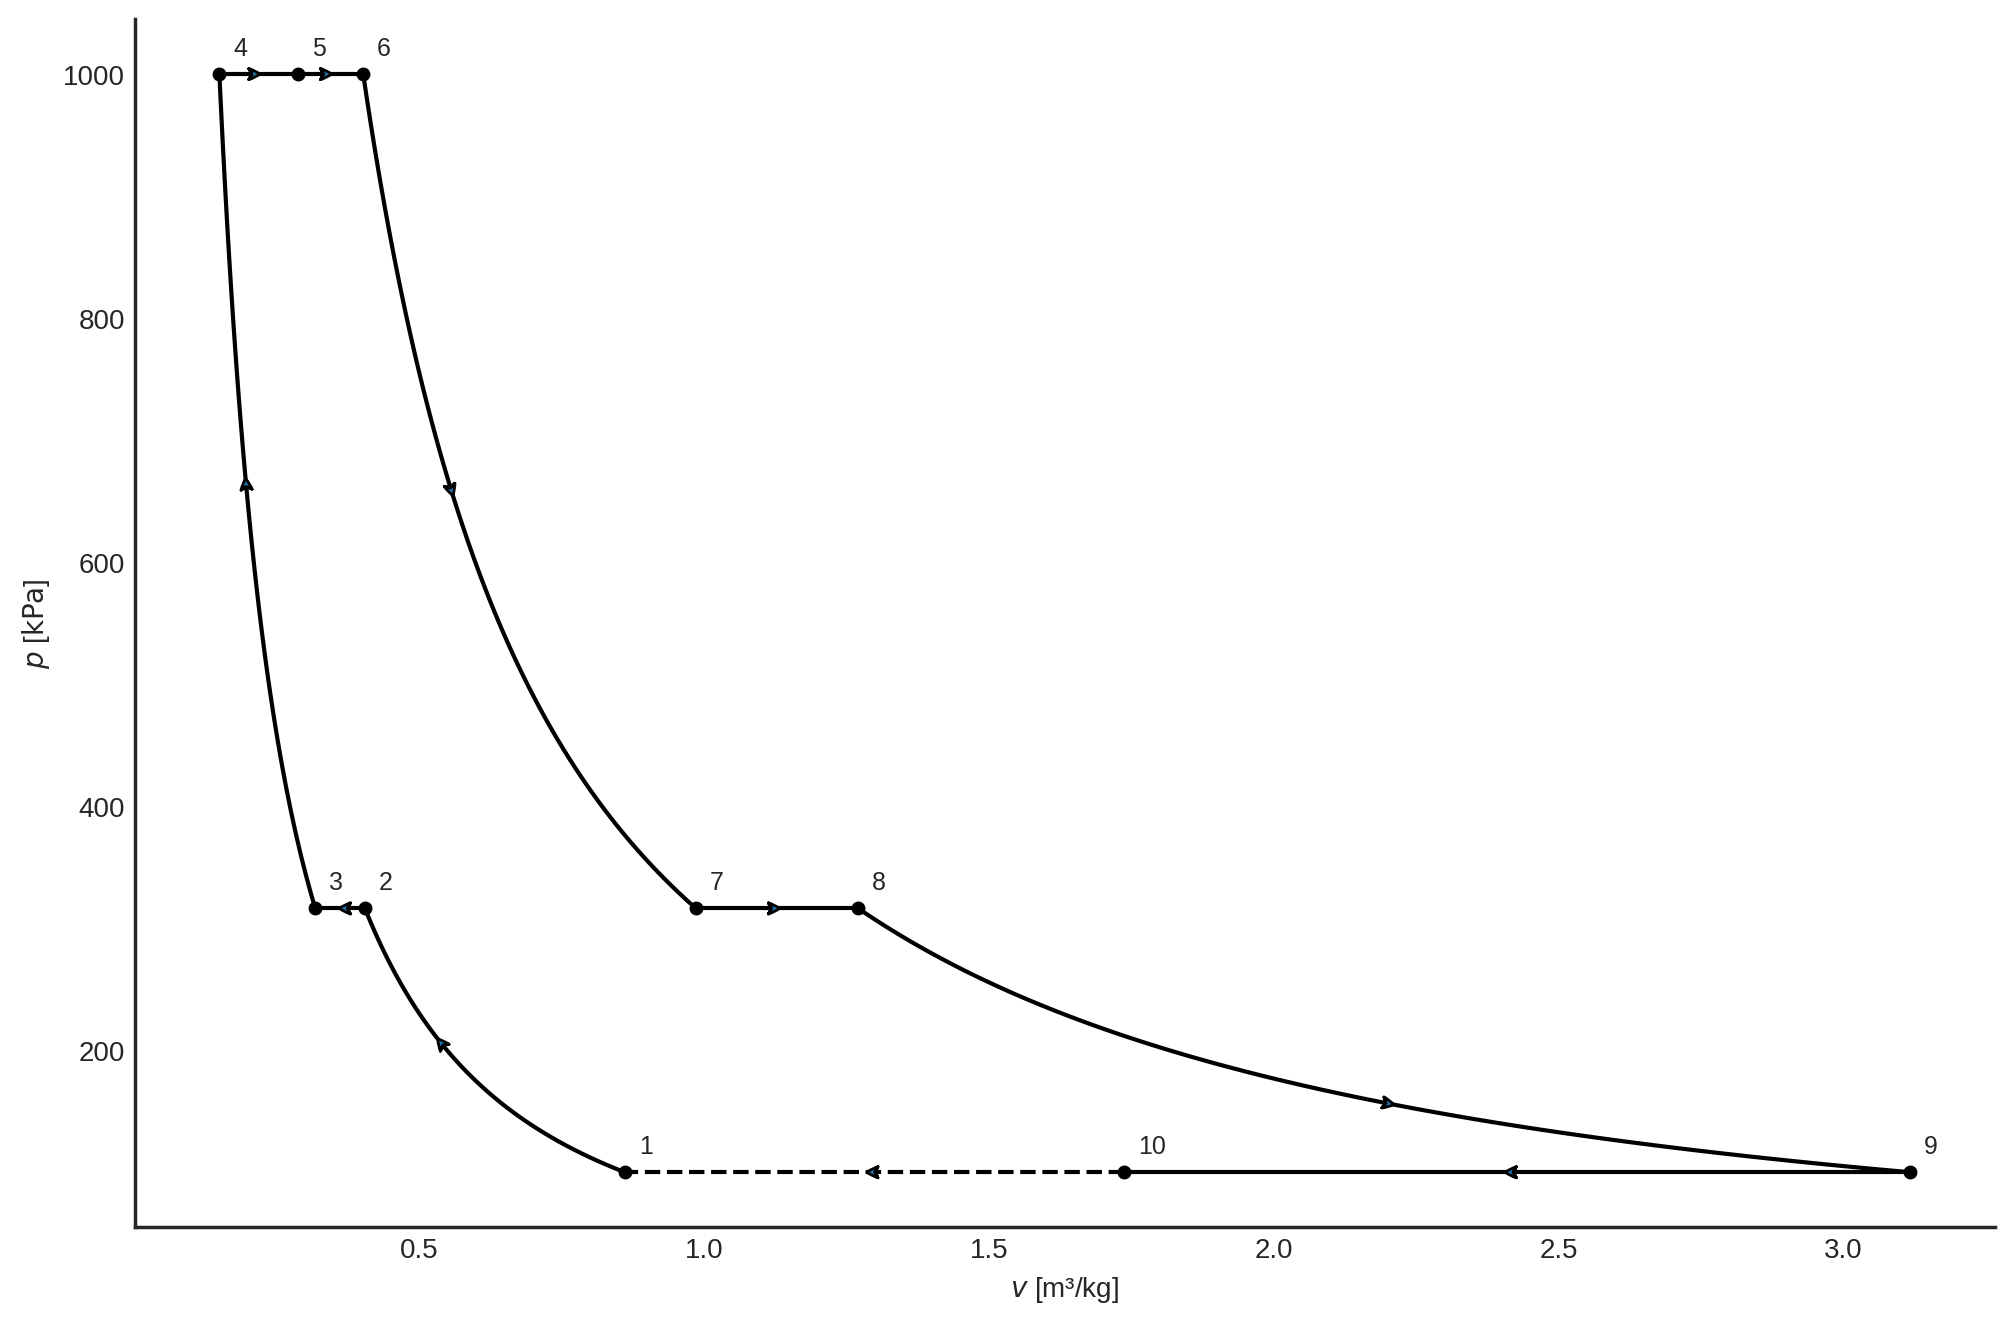

In [12]:
pv = air.pv_diagram()

# plot each state on the p,v diagram
for i in [1,2,3,4,5,6,7,8,9,10]:
    pv.plot_state(states[i],label_loc='north east')


# plot the process paths (Note: isentropic and non-ideal path not implemented for constant specific heat)
pv.plot_process(states[1],states[2],path='nonideal')
pv.plot_process(states[2],states[3],path='isobaric')
pv.plot_process(states[3],states[4],path='nonideal')
pv.plot_process(states[4],states[5],path='isobaric')
pv.plot_process(states[5],states[6],path='isobaric')
pv.plot_process(states[6],states[7],path='nonideal')
pv.plot_process(states[7],states[8],path='isobaric')
pv.plot_process(states[8],states[9],path='nonideal');
pv.plot_process(states[9],states[10],path='isobaric');
pv.plot_process(states[10],states[1],path='isobaric',linestyle='dashed');

##### Log-Log Scale

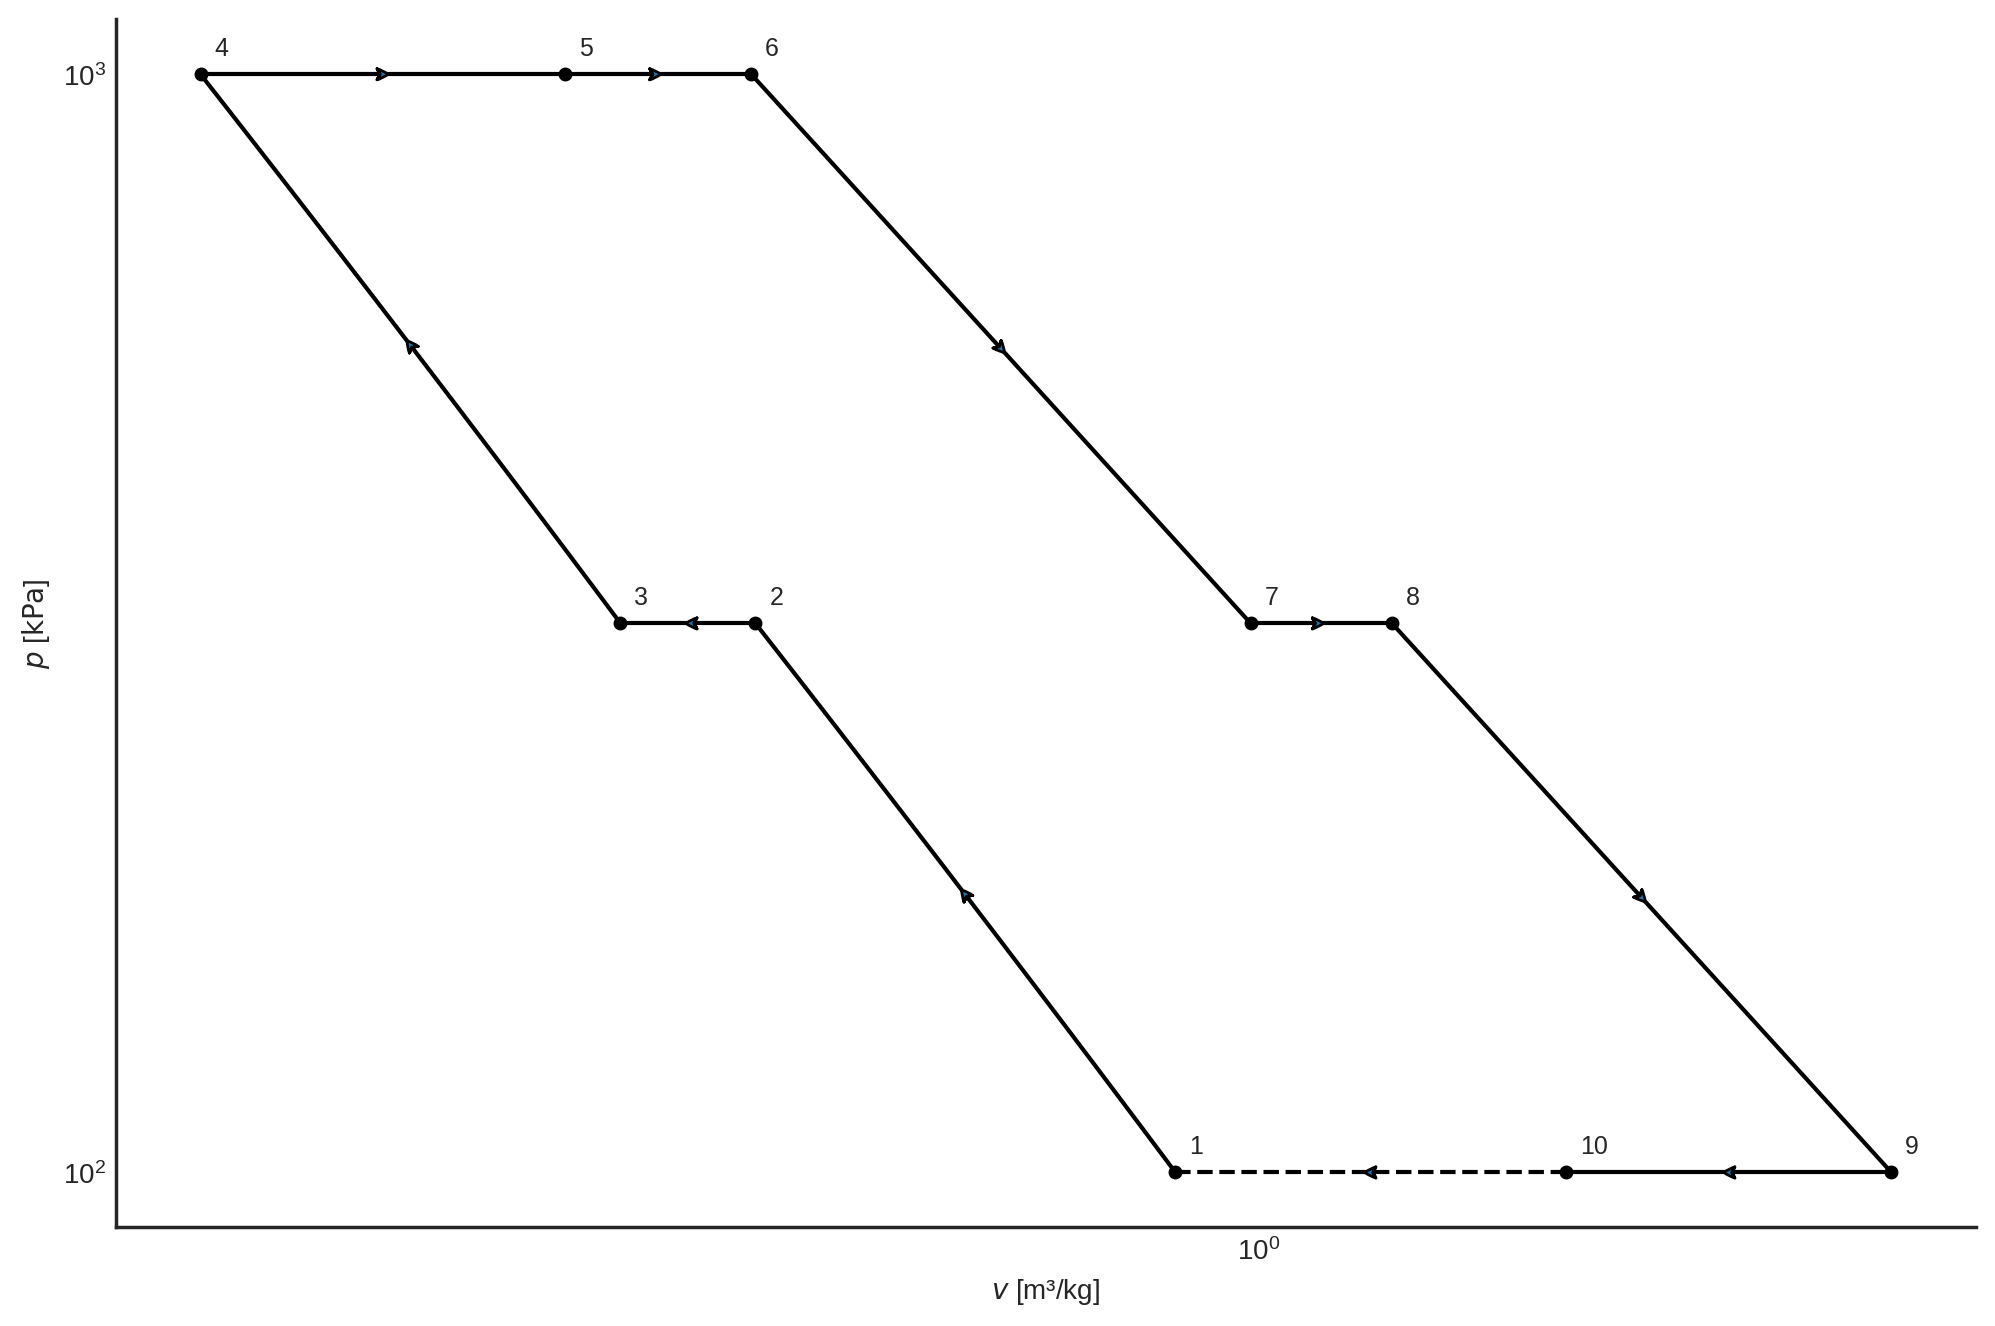

In [13]:
pv = air.pv_diagram(log_x=True, log_y=True)

# plot each state on the p,v diagram
for i in [1,2,3,4,5,6,7,8,9,10]:
    pv.plot_state(states[i],label_loc='north east')


# plot the process paths (Note: isentropic and non-ideal path not implemented for constant specific heat)
pv.plot_process(states[1],states[2],path='nonideal')
pv.plot_process(states[2],states[3],path='isobaric')
pv.plot_process(states[3],states[4],path='nonideal')
pv.plot_process(states[4],states[5],path='isobaric')
pv.plot_process(states[5],states[6],path='isobaric')
pv.plot_process(states[6],states[7],path='nonideal')
pv.plot_process(states[7],states[8],path='isobaric')
pv.plot_process(states[8],states[9],path='nonideal');
pv.plot_process(states[9],states[10],path='isobaric');
pv.plot_process(states[10],states[1],path='isobaric',linestyle='dashed');

#### (b) $T$-$s$ diagram
*Note: the process paths do not line up with the state points in this diagram because the paths were 
calculated for variable specific heat, but the states were calculated using the
cold-air-standard assumptions (constant specific heat).  Therefore the errors resulting from the constant specific heat assumption are evident in the misalignment on the graph.  The larger inconsistencies at the higher temperatures illustrate how the constant specific heat assumption becomes increasing inaccurate as the temperature change of the fluid increases.*

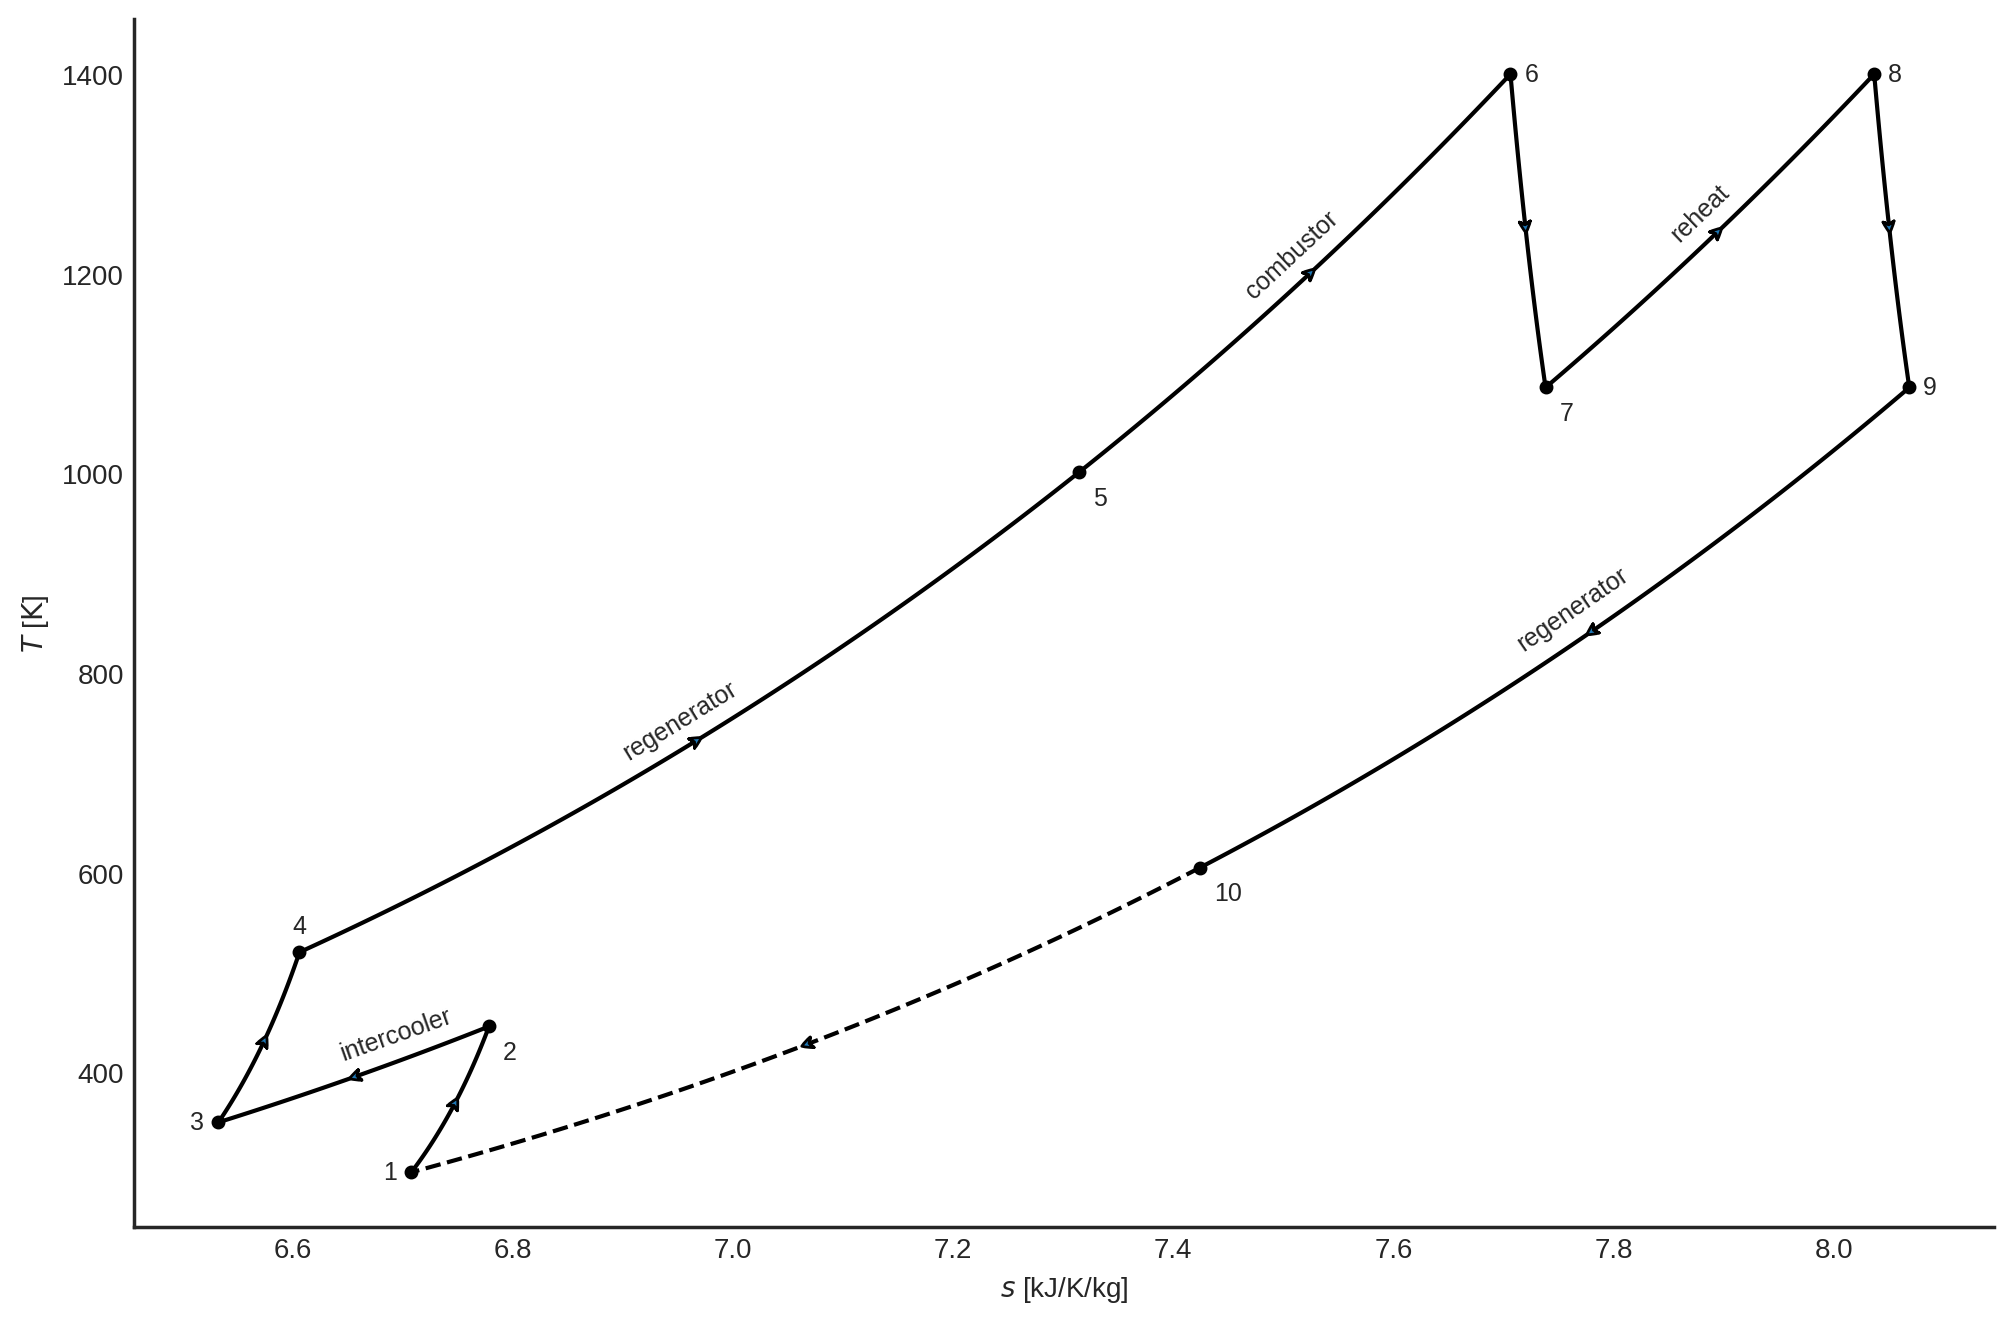

In [14]:
Ts = air.Ts_diagram()

# plot each state on the p,v diagram
for i in [1,3]:
    Ts.plot_state(states[i],label_loc='west')
Ts.plot_state(states[4])
for i in [6,8,9]:
    Ts.plot_state(states[i],label_loc='east')
for i in [2,5,7,10]:
    Ts.plot_state(states[i],label_loc='south east')
    
# plot the process paths (Note: isentropic and non-ideal path not implemented for constant specific heat)
Ts.plot_process(states[1],states[2],path='nonideal')
Ts.plot_process(states[2],states[3],path='isobaric',label='intercooler',labelprops=dict(ha='left'))
Ts.plot_process(states[3],states[4],path='nonideal')
Ts.plot_process(states[4],states[5],path='isobaric',label='regenerator')
Ts.plot_process(states[5],states[6],path='isobaric',label='combustor')
Ts.plot_process(states[6],states[7],path='nonideal')
Ts.plot_process(states[7],states[8],path='isobaric',label='reheat')
Ts.plot_process(states[8],states[9],path='nonideal');
Ts.plot_process(states[9],states[10],path='isobaric',label='regenerator');
Ts.plot_process(states[10],states[1],path='isobaric',linestyle='dashed');

In [16]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 4) Execute this cell to create an HTML file showing only the output 
# 5) Submit the .html file located in the folder with this notebook

!jupyter nbconvert --to html_embed --no-input --no-prompt "Ex9.5 Modified Brayton Cycle (Cold-Air-Standard).ipynb"

[NbConvertApp] Converting notebook Ex9.5 Modified Brayton Cycle (Cold-Air-Standard).ipynb to html_embed


[NbConvertApp] Writing 1021094 bytes to Ex9.5 Modified Brayton Cycle (Cold-Air-Standard).html
